In [3]:

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
from termcolor import colored as cl # text customization


from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

sns.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/VenkataNikhil/House_Price_Prediction/master/House_Data.csv")
df.set_index('Id',inplace=True)
df.head(30)


,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
Id,,,,,,,,,,,
1,8450,196.0,150,856,856,854,1710,548,0,61,208500
2,9600,0.0,284,1262,1262,0,1262,460,298,0,181500
3,11250,162.0,434,920,920,866,1786,608,0,42,223500
4,9550,0.0,540,756,961,756,1717,642,0,35,140000
5,14260,350.0,490,1145,1145,1053,2198,836,192,84,250000
6,14115,0.0,64,796,796,566,1362,480,40,30,143000
7,10084,186.0,317,1686,1694,0,1694,636,255,57,307000
8,10382,240.0,216,1107,1107,983,2090,484,235,204,200000
9,6120,0.0,952,952,1022,752,1774,468,90,0,129900


In [5]:
temp_df = pd.read_csv("https://raw.githubusercontent.com/VenkataNikhil/House_Price_Prediction/master/House_Data.csv")
temp_df.set_index('Id',inplace = True)
temp_df.head(10)

,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
Id,,,,,,,,,,,
1,8450,196.0,150,856,856,854,1710,548,0,61,208500
2,9600,0.0,284,1262,1262,0,1262,460,298,0,181500
3,11250,162.0,434,920,920,866,1786,608,0,42,223500
4,9550,0.0,540,756,961,756,1717,642,0,35,140000
5,14260,350.0,490,1145,1145,1053,2198,836,192,84,250000
6,14115,0.0,64,796,796,566,1362,480,40,30,143000
7,10084,186.0,317,1686,1694,0,1694,636,255,57,307000
8,10382,240.0,216,1107,1107,983,2090,484,235,204,200000
9,6120,0.0,952,952,1022,752,1774,468,90,0,129900


In [6]:
df.describe()

,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,103.685262,567.240411,1057.429452,1162.626712,346.992466,1515.463699,472.980137,94.244521,46.660274,180921.195890
std,9981.264932,181.066207,441.866955,438.705324,386.587738,436.528436,525.480383,213.804841,125.338794,66.256028,79442.502883
min,1300.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,129975.000000
50%,9478.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,163000.000000
75%,11601.500000,166.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,576.000000,168.000000,68.000000,214000.000000
max,215245.000000,1600.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,1418.000000,857.000000,547.000000,755000.000000


Axes(0.125,0.11;0.0596154x0.77) Axes(0.196538,0.11;0.0596154x0.77) Axes(0.268077,0.11;0.0596154x0.77)


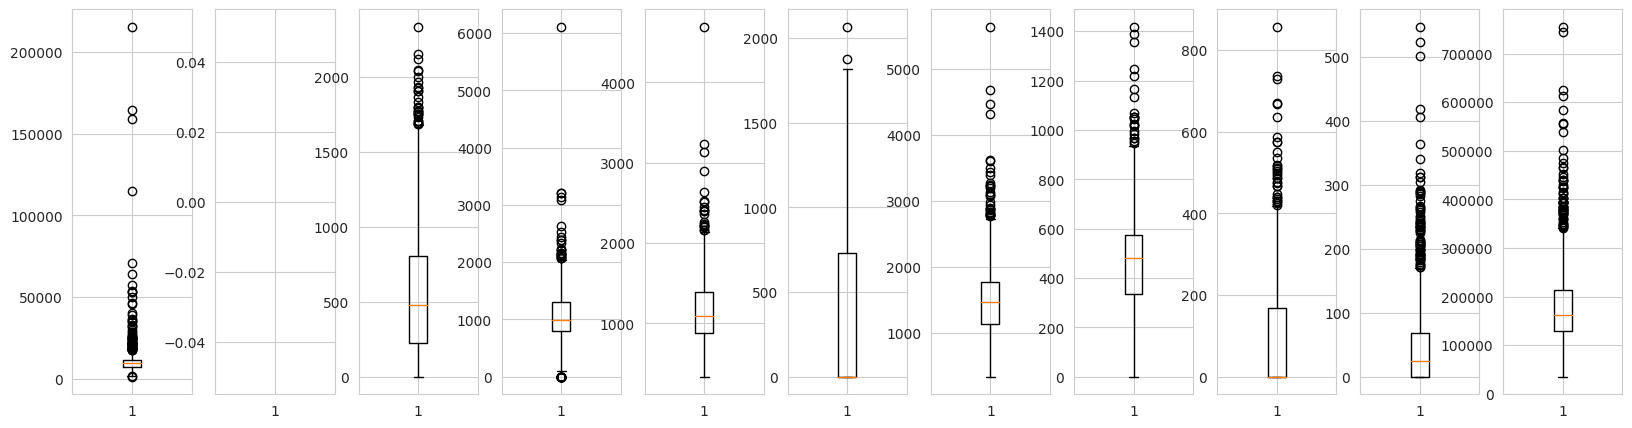

In [7]:
fig, axs = plt.subplots(1,len(df.columns), figsize=(20,5))
print(axs[0],axs[1],axs[2])

for i,column in enumerate(df.columns):
  axs[i].boxplot(df[column])


# for i in range(0,len(df.columns)):
  # plt.boxplot(df.iloc[:,i])

In [8]:
df['MasVnrArea'].dtype == 'O' # Meaning it's numerical variable

False

In [9]:
mean_imputer = SimpleImputer(strategy="mean")
median_imputer = SimpleImputer(strategy="median")
constant_value = SimpleImputer(strategy = "constant", fill_value=0)

In [10]:
median_imputer.fit(df)

SimpleImputer(strategy='median')

In [11]:
constant_value.fit(df)
df = constant_value.transform(df) # Added constant value 0 to 8 missing value columns

In [12]:
df = pd.DataFrame(df) # After adding constant value, datatype changed from DataFrame to numpy array. So coverting it to DataFrame again and adding columns in next step

In [13]:
df.columns = temp_df.columns

In [14]:
df.isnull().sum()

LotArea        0
MasVnrArea     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
2ndFlrSF       0
GrLivArea      0
GarageArea     0
WoodDeckSF     0
OpenPorchSF    0
SalePrice      0
dtype: int64

<Axes: xlabel='MasVnrArea', ylabel='Count'>

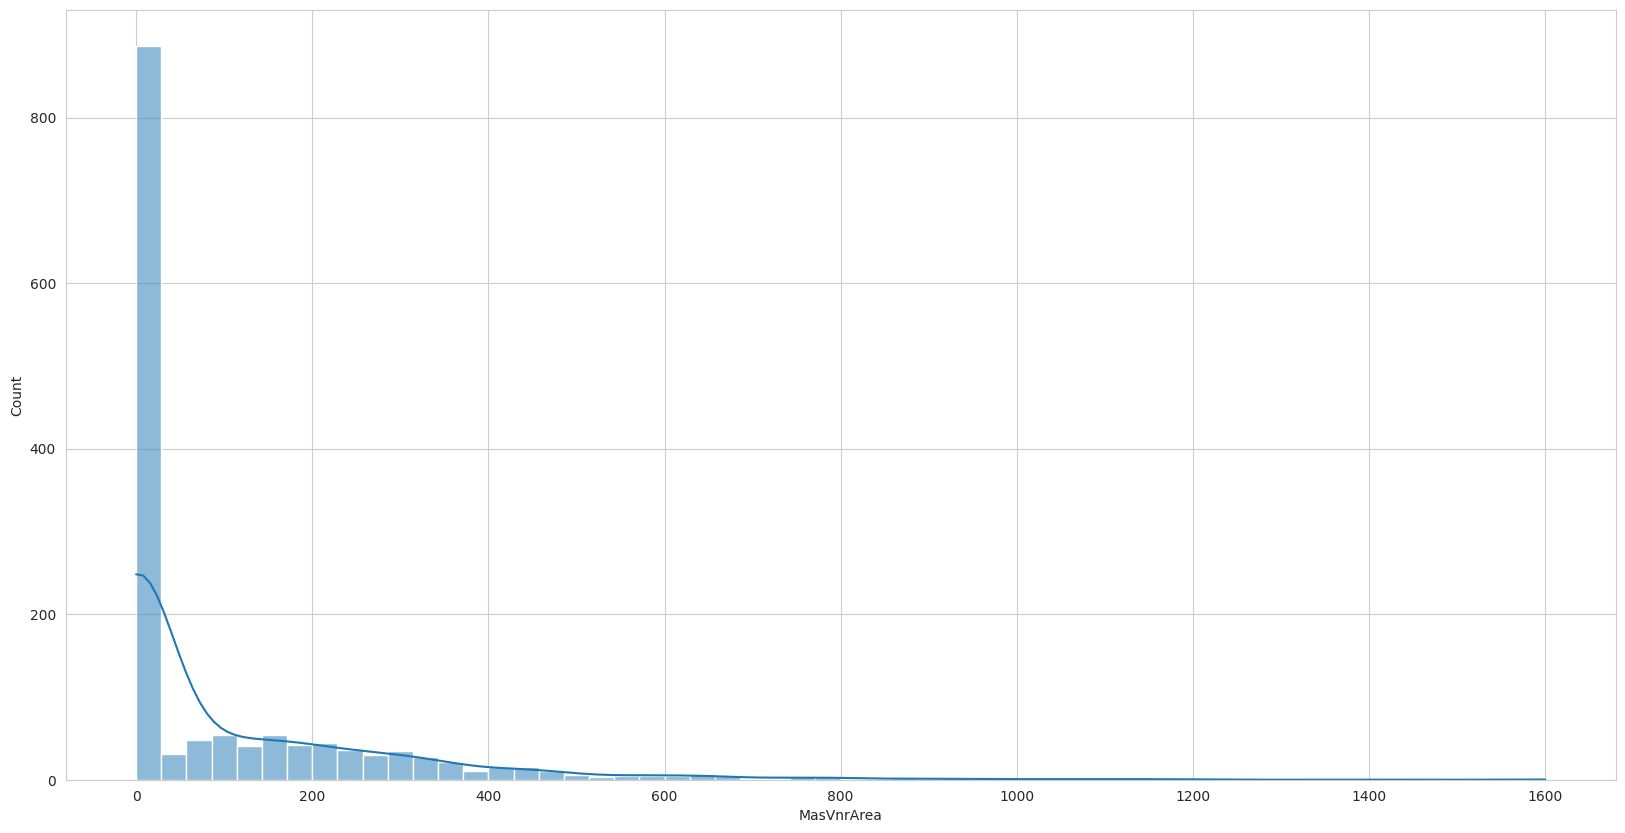

In [16]:
sns.histplot(data=df, x='MasVnrArea',kde=True)

In [17]:
value_counts = df['MasVnrArea'].value_counts().sort_values(ascending = False)
percentage_value_counts = (value_counts/len(df) )*100
percentage_value_counts 

0.0      59.520548
72.0      0.547945
108.0     0.547945
180.0     0.547945
120.0     0.479452
           ...    
760.0     0.068493
391.0     0.068493
27.0      0.068493
361.0     0.068493
119.0     0.068493
Name: MasVnrArea, Length: 327, dtype: float64

In [18]:
df = df.astype(int) 


In [19]:
df.dtypes

LotArea        int64
MasVnrArea     int64
BsmtUnfSF      int64
TotalBsmtSF    int64
1stFlrSF       int64
2ndFlrSF       int64
GrLivArea      int64
GarageArea     int64
WoodDeckSF     int64
OpenPorchSF    int64
SalePrice      int64
dtype: object

<Axes: >

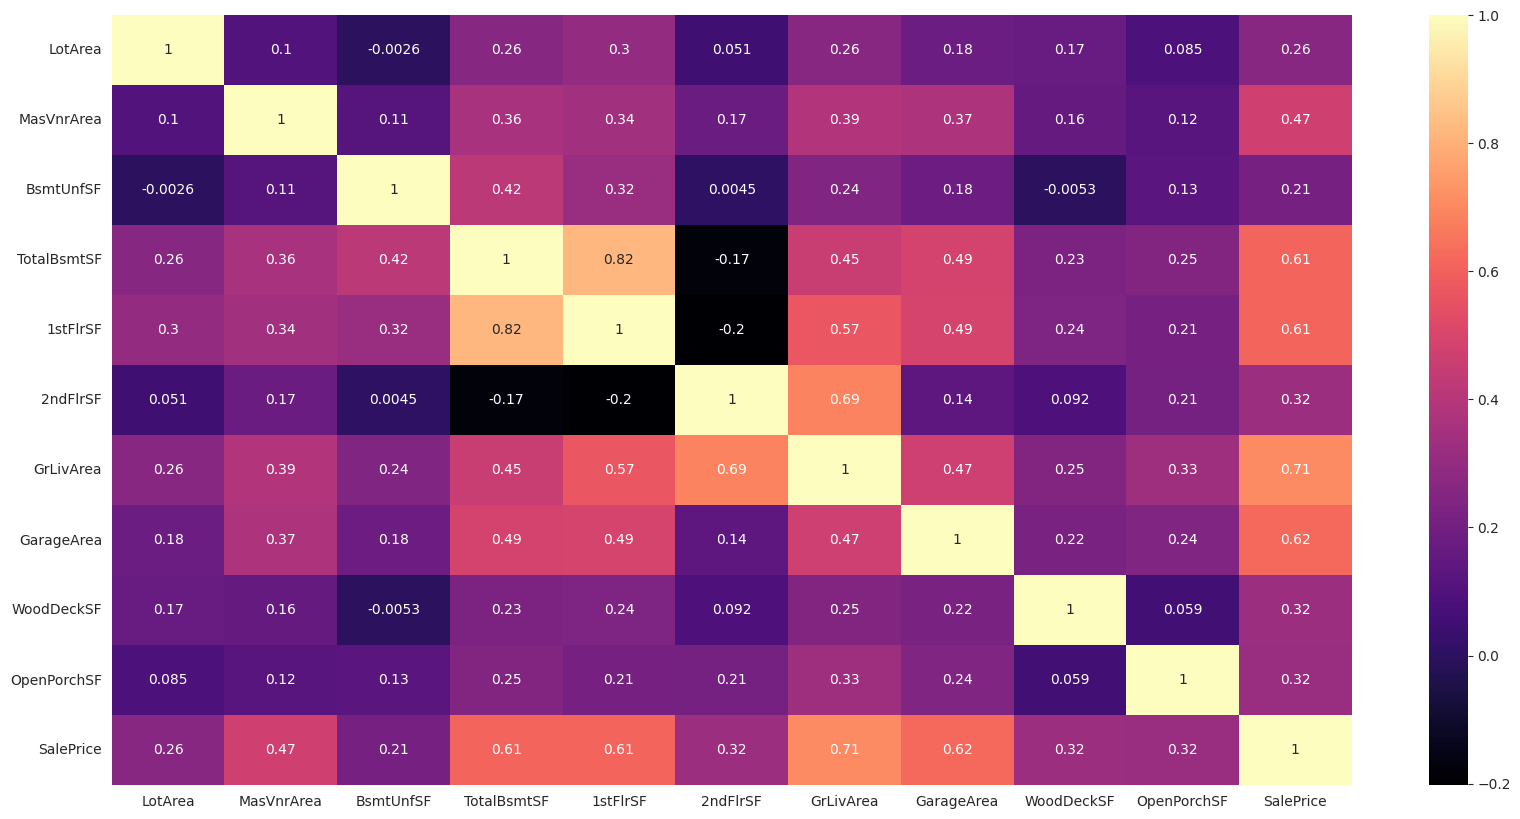

In [20]:
# Correlation Matrix with data
sns.heatmap(df.corr(), annot = True, cmap='magma')


In [24]:

# FEATURE SELECTION & DATA SPLIT

X_var = df[['LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']].values
y_var = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[0:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:5])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:5])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:5])


X_train samples :  [[11694   452  1774  1822  1828     0  1828   774     0   108]
 [ 6600     0   894   894   894     0   894   308     0     0]
 [13360     0   163   876   964     0   964   432     0     0]
 [13265   148   350  1568  1689     0  1689   857   150    59]
 [13704   150  1541  1541  1541     0  1541   843   468    81]]
X_test samples :  [[32668     0   816  2035  2515     0  2515   484     0     0]
 [ 9490     0   238   806   958   620  1578   240     0     0]
 [ 7015   161   524   709   979   224  1203   352     0     0]
 [10005   299   768  1160  1156   866  2022   505   288   117]
 [ 1680   381   525   525   525   567  1092   264     0     0]]
y_train samples :  618    314813
870    109500
92     163500
817    271000
302    205000
Name: SalePrice, dtype: int64
y_test samples :  529    200624
491    133000
459    110000
279    192000
655     88000
Name: SalePrice, dtype: int64


In [76]:
ols = LinearRegression()
ols.fit(X_train,y_train)
ols_predict = ols.predict(X_test)


In [95]:
ridge_ln = Ridge(alpha = 1)
ridge_ln.fit(X_train,y_train)
ridge_ln_predict = ridge_ln.predict(X_test)


In [89]:
lasso_ln = Lasso(alpha = 0.08)
lasso_ln.fit(X_train, y_train)
lasso_ln_predict = lasso_ln.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.680e+11, tolerance: 7.191e+08
  model = cd_fast.enet_coordinate_descent(


In [81]:
bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

In [90]:
en = ElasticNet(alpha = 0.09)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.930e+11, tolerance: 7.191e+08
  model = cd_fast.enet_coordinate_descent(


In [96]:
print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_predict)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_ln_predict)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_ln_predict)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 0.466130852991015
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.4661308523730725
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.466130788126622
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.4660629694377352
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.4661307569233316
-------------------------------------------------------------------------------


In [91]:
print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_predict)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_ln_predict)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_ln_predict)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 0.466130852991015
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.46613085268204346
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.466130788126622
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.4660629694377352
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.4661307569233316
-------------------------------------------------------------------------------


In [94]:
print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_predict)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_ln_predict)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_ln_predict)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.4659776698717727
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.4659776695576947
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.46597760357973494
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 0.4659098399050552
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 0.46597757185676036
-------------------------------------------------------------------------------
